<b>EnergyUsagePrediction.data_exp.asum.v1_0_5.ipynb</b>
<br/>For my use case "Energy usage prediction based on historical weather and energy usage data.", I use a dataset which can be downloaded from <a href="https://www.kaggle.com/taranvee/smart-home-dataset-with-weather-information">kaggle</a>
<br/>The last line of the csv contains garbage. I've already removed that line before starting the data exploration.
<br/>This task is crucial for understanding your data. Data quality is the most important driver for success in any data science project. 
<br/>So, this task lets you address data quality from the beginning. 
<br/>This includes going back to the data owners and asking them for better quality data, if applicable.
<br/>
<br/>Load <i>smart-home-dataset-with-weather-information_filtered.csv</i> file into pandas dataframe.
<br/>Explore data. 

In [1]:
import types
import numpy as np
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_x = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='[credentials]]',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_x.get_object(Bucket='xyz',Key='smart-home-dataset-with-weather-information_filtered.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282,0.0,24.4,0.0


<b>Inspect data types</b>
<br/>The pandas dataframe df contains our csv content.
<br/>Let have a look at the data types. df.types

In [2]:
df.dtypes

time                     int64
use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Furnace 2 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Kitchen 14 [kW]        float64
Kitchen 38 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing              int64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
dtype: o

<br/>From the dataset description we known that 'time' is a one minute based timeline for 350 days
<br/>All 'xyz [kW]' items contain information about energy usage or generation.
<br/>So let's in spect the other columns first.
<br/>Most values are float or integer. icon, summary and cloudCover are of type object.
<br/>check unique items of icon, summary and cloudCover columns to see if this are numbers or textual items

In [3]:
df['icon'].unique()

array(['clear-night', 'partly-cloudy-night', 'clear-day', 'cloudy',
       'partly-cloudy-day', 'rain', 'snow', 'wind', 'fog'], dtype=object)

In [4]:
df['summary'].unique()

array(['Clear', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Drizzle',
       'Light Rain', 'Rain', 'Light Snow', 'Flurries', 'Breezy', 'Snow',
       'Rain and Breezy', 'Foggy', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Flurries and Breezy', 'Dry',
       'Heavy Snow'], dtype=object)

In [5]:
df['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', 0.24, 1.0, 0.31, 0.28, 0.15, 0.41, 0.1, 0.12, 0.08, 0.09,
       0.19, 0.04, 0.05, 0.29, 0.27, 0.35, 0.18, 0.06, 0.03, 0.11, 0.14,
       0.25, 0.78, 0.0, 0.16, 0.21, 0.23, 0.17, 0.75, 0.26, 0.2, 0.76,
       0.13, 0.77, 0.46, 0.07, 0.55, 0.02, 0.01, 0.51, 0.47, 0.5, 0.4,
       0.3, 0.22, 0.43, 0.33, 0.6, 0.68, 0.66, 0.45, 0.34, 0.52, 0.67,
       0.48, 0.49, 0.39, 0.37, 0.62, 0.36, 0.79, 0.61, 0.38, 0.42, 0.53,
       0.63, 0.44, 0.54, 0.32, 0.56, 0.58, 0.72, 0.57, 0.73, 0.71, 0.64,
       0.59], dtype=object)

<br/>As you can see icon and summary contain small lists of items (enumerators).
<br/>cloudCover contains text and floats values.
<br/>we can either remove the textual items or replace them. First we need to know how much bad (garbage) data is inside this column.

In [6]:
garbage = df['cloudCover']
(df[garbage == 'cloudCover'])['cloudCover'].count()

58

In [7]:
df['cloudCover'].count()

503910

So we have 58 garbage items in a total of 503910 items. Less than 0.012%

Let's have look at the mean, standard defiation, min, and max values. The pandas dataframe methode desribe has al these properties build in. To make it more readable we swap rows and columns.

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
time,503910.0,1.451876e+09,145466.431411,1.451624e+09,1.451750e+09,1.451876e+09,1.452002e+09,1.452128e+09
use [kW],503910.0,8.589624e-01,1.058207,0.000000e+00,3.676667e-01,5.623333e-01,9.702500e-01,1.471457e+01
gen [kW],503910.0,7.622942e-02,0.128428,0.000000e+00,3.366667e-03,4.283333e-03,8.391667e-02,6.138833e-01
House overall [kW],503910.0,8.589624e-01,1.058207,0.000000e+00,3.676667e-01,5.623333e-01,9.702500e-01,1.471457e+01
Dishwasher [kW],503910.0,3.136752e-02,0.190951,0.000000e+00,0.000000e+00,1.670000e-05,2.333330e-04,1.401767e+00
Furnace 1 [kW],503910.0,9.921030e-02,0.169059,1.670000e-05,2.023333e-02,2.061667e-02,6.873333e-02,1.934083e+00
Furnace 2 [kW],503910.0,1.367792e-01,0.178631,6.670000e-05,6.440000e-02,6.663333e-02,8.063333e-02,7.949333e-01
Home office [kW],503910.0,8.128689e-02,0.104466,8.330000e-05,4.038333e-02,4.221667e-02,6.828333e-02,9.717500e-01
Fridge [kW],503910.0,6.355641e-02,0.076199,6.670000e-05,5.083333e-03,5.433333e-03,1.254167e-01,8.512667e-01
Wine cellar [kW],503910.0,4.213665e-02,0.057967,1.670000e-05,7.133333e-03,8.083333e-03,5.319167e-02,1.273933e+00


For our use case we need the weather information as input and energy usage as output.
<br/>So we can remove all 'xyz [kW]' items except for 'use [kW]'. But we'll do that in the etl part of the project.


Let's check if we can convert are time column to a pandas timestamp

In [9]:
pd.to_datetime(df['time'], unit='s')

0        2016-01-01 05:00:00
1        2016-01-01 05:00:01
2        2016-01-01 05:00:02
3        2016-01-01 05:00:03
4        2016-01-01 05:00:04
                 ...        
503905   2016-01-07 00:58:25
503906   2016-01-07 00:58:26
503907   2016-01-07 00:58:27
503908   2016-01-07 00:58:28
503909   2016-01-07 00:58:29
Name: time, Length: 503910, dtype: datetime64[ns]

In [10]:
df2 = pd.to_datetime(df['time'], unit ='s')
print(df2.min())
print(df2.max())


2016-01-01 05:00:00
2016-01-07 00:58:29


Ok, it can be converted to timestamps, but according to the dataset description, it should be 1-minute timestep. So in our ETL we need to convert fix the timestamp to be real 1 minute steps and convert it to day of year, total minutes of day, etc.
<br/>We can use the icon indicator to find the first occurance of 'day' and 'night'.



In [11]:
def printFirstIndexOf(label, value):
    matches =  (df[df[label] == value]).index
    if(matches.size >0):
        print(str(value) + ", first match:" + str(matches[0]))
        return
    print(str(value) + ' was not found in ' + label)


#print(firstIndexOf('icon', 'clear-night'))
printFirstIndexOf('icon', 'clear-night')
printFirstIndexOf('icon', 'partly-cloudy-night')
printFirstIndexOf('icon', 'clear-day')
printFirstIndexOf('icon', 'cloudy')
printFirstIndexOf('icon', 'partly-cloudy-day')
printFirstIndexOf('icon', 'rain')
printFirstIndexOf('icon', 'snow')
printFirstIndexOf('icon', 'wind')
printFirstIndexOf('icon', 'fog')




clear-night, first match:0
partly-cloudy-night, first match:58
clear-day, first match:464
cloudy, first match:754
partly-cloudy-day, first match:2030
rain, first match:12876
snow, first match:16298
wind, first match:25578
fog, first match:106082


In [12]:
print(df['icon'].iloc[0])
print(df['icon'].iloc[58])
print(df['icon'].iloc[464])
print(df['icon'].iloc[754])
print(df['icon'].iloc[2030])
print(df['icon'].iloc[12876])
print(df['icon'].iloc[16298])
print(df['icon'].iloc[25578])
print(df['icon'].iloc[106082])

clear-night
partly-cloudy-night
clear-day
cloudy
partly-cloudy-day
rain
snow
wind
fog


Ok, so the first occurance of day is at 464: 7.73 hours after first occurance of midnight. If the first data item would indeed be '2016-01-01 05:00:00' then our first day item would be at 12.44 
That could be if true if you have a very short period of sunlight during day (Daytime is from sunrise (this varies, but we can say approximately 6am) to sunset (we can say approximately 6pm). Night-time is from sunset to sunrise. Every day starts precisely at midnight. AM (ante-meridiem = before noon) starts just after midnight.) But then the number of daytime items following after 12.44 should be rather small.
Let's check if we have still day items after sunrise




, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ?, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1 (1)
, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ?, ?, ?, ? (31)
, 1, 1, ?, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1 (61)
, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1 (92)
, ?, 1, ?, ?, 1, 1, ?, 1, ?, 0, ?, 0, 0, 0, ?, 0, 0, 0, 1, 1, ?, 1, 1, 1, 1 (120)
, ?, 1, ?, 1, ?, ?, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ?, 1 (153)
, ?, 1, 1, 1, 1, 0, 0, ?, 0, ?, ?, 0, ?, 0, 1, 1, ?, 1, 1, ?, 1, ?, 1, ?, ? (183)
, ?, ?, ?, ?, ?, ?, ?, 1, 1, 1, 1, ?, 1, ?, ?, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1 (214)
, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ?, ?, ?, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0 (244)
, 1, 1, 1, ?, ?, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1 (275)
, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0 (305)
, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1 (330)
, 0, 1, 1, 1, ?, ?, ?

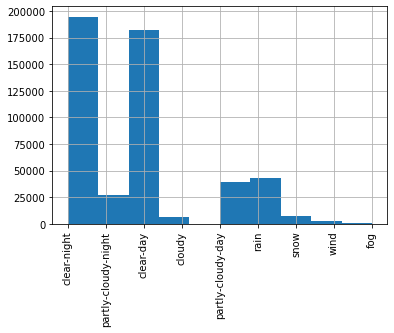

In [16]:
dayOffset = 460
minutesInDay = 24*60

def getDayOrNight(value):
    if(value == 'clear-night'):
        return '0'
    if(value == 'partly-cloudy-night'):
        return '0'
    if(value == 'clear-day'):
        return '1'
    if(value == 'partly-cloudy-day'):
        return '1'
    return '?'

def printDayValues(days):
    print(''
        + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)]) 
        + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+60])
        + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+120])
        + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+180])
        + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+240])
        + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+300])
        + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+360])
        + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+420])
        + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+480])
        + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+540])
        + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+600])
        + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+660])
        + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+720])
          + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+780])
          + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+840])
          + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+900])
          + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+960])
          + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+1020])
          + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+1080])
          + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+1140])
          + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+1200])
          + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+1260])
          + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+1320])
          + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+1380])
          + ', ' + getDayOrNight(df['icon'].iloc[dayOffset+(days*minutesInDay)+1440])
        + ' ('+ str(days)+')' 
    )


#t1
printDayValues(1)
#t1+month
printDayValues(31)

#t1+ 2 months
printDayValues(61)

#t1+ 3 months
printDayValues(92)

#t1+ 4 months
printDayValues(120)

#t1+ 5 months
printDayValues(153)

#t1+ 6 months
printDayValues(183)

#t1+ 7 months
printDayValues(214)

#t1+ 8 months
printDayValues(244)

# plus 9 months
printDayValues(275)

# plus 10 months
printDayValues(305)

# plus 11 months
printDayValues(330)


# almost 12 months
printDayValues(348)


#lets have a look at the icon distrubution
print(df['icon'].hist(xrot=90))





From the histogram we can see that the amount of night-items and the day-items looks fairly 50/50. 
But the shifts in start of day seem quite extreme to me, we don't exactly know where the house is located. But is it an indication of poor data. So I think it might be wise to leave out the icon data in our model.



Now let's see how the energy usage is distributed. For this we can use boxplot from matplotlib

In [17]:
energySamples = df['use [kW]'].sample(n=100, random_state=5)

In [18]:
%matplotlib inline

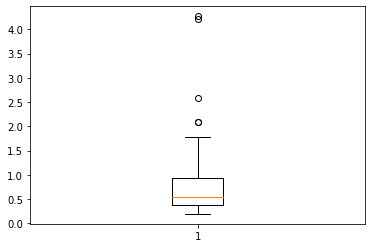

In [19]:
import matplotlib.pyplot as plt
plt.boxplot(energySamples)
plt.show()



The use [kW] has outliers above approximately. 
We can 
<ul>
    <li>ignore the outliers.</li>
    <li>we can remove all items with outliers</li>
    <li>or fill them we the mean value or with zeros.</li>
</ul>
All of the above solutions can have a huge influence on performance of the model. 
<br/>Let's have a look at the energy usaga through time.
<br/>We can see here that if we cut of above 2 kW, we loose quite some data.

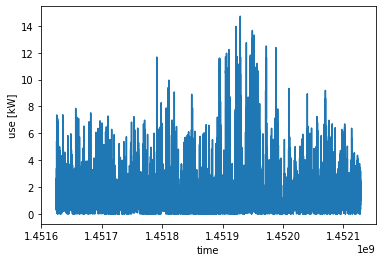

In [20]:
#samples = df[['time','use [kW]']].sample(n=100, random_state=5).sort_index()
samples = df[['time','use [kW]']]
samples_x=samples['time']
samples_y = samples['use [kW]']

plt.plot(samples_x,samples_y)
plt.xlabel('time')
plt.ylabel('use [kW]')
plt.show()


Let's have a look at the temperature, humidity, windspeed and dewpoint as well.

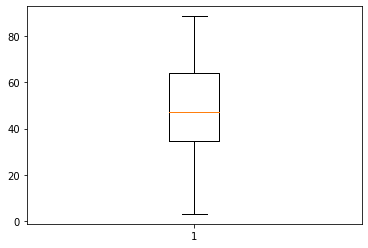

In [21]:
#Temperature has no outliers
temperatureSamples = df['temperature'].sample(n=100, random_state=5)
plt.boxplot(temperatureSamples)
plt.show()


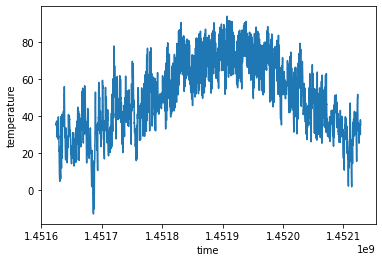

In [22]:
#samples = df[['time','temperature']].sample(n=100, random_state=5).sort_index()
samples = df[['time','temperature']]
samples_x=samples['time']
samples_y = samples['temperature']

plt.plot(samples_x,samples_y)
plt.xlabel('time')
plt.ylabel('temperature')
plt.show()

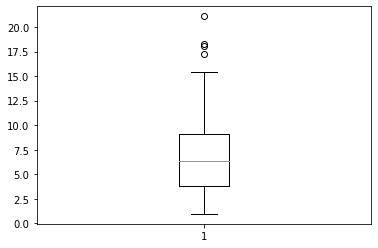

In [23]:
#Windspeed has outliers avbove 15  (mph? km/h)
windSpeedSamples = df['windSpeed'].sample(n=100, random_state=5)
plt.boxplot(windSpeedSamples)
plt.show()


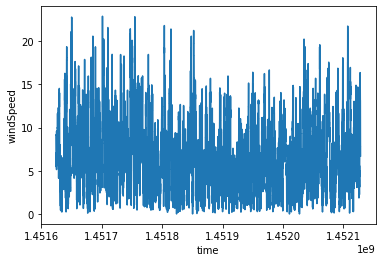

In [24]:
#samples = df[['time','windSpeed']].sample(n=100, random_state=5).sort_index()
samples = df[['time','windSpeed']]
samples_x=samples['time']
samples_y = samples['windSpeed']

plt.plot(samples_x,samples_y)
plt.xlabel('time')
plt.ylabel('windSpeed')
plt.show()

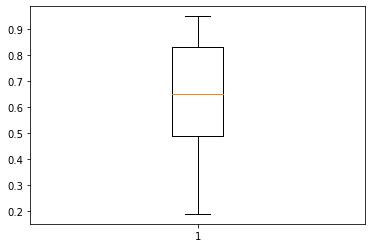

In [25]:
#Humitidy show no outliers
humiditySamples = df['humidity'].sample(n=100, random_state=5)
plt.boxplot(humiditySamples)
plt.show()



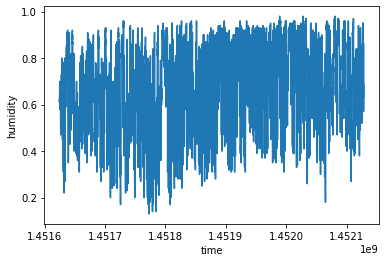

In [26]:
#samples = df[['time','humidity']].sample(n=100, random_state=5).sort_index()
samples = df[['time','humidity']]
samples_x=samples['time']
samples_y = samples['humidity']

plt.plot(samples_x,samples_y)
plt.xlabel('time')
plt.ylabel('humidity')
plt.show()

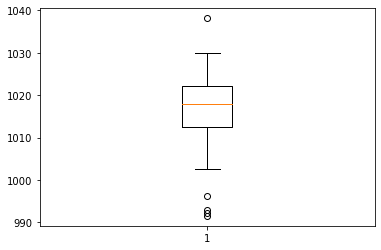

In [27]:
#Pressure show outliers below 1000 and above 1030
pressureSamples = df['pressure'].sample(n=100, random_state=5)
plt.boxplot(pressureSamples)
plt.show()



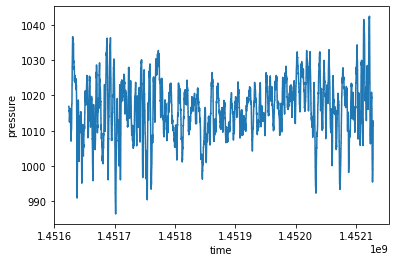

In [28]:
#samples = df[['time','pressure']].sample(n=100, random_state=5).sort_index()
samples = df[['time','pressure']]
samples_x=samples['time']
samples_y = samples['pressure']

plt.plot(samples_x,samples_y)
plt.xlabel('time')
plt.ylabel('pressure')
plt.show()

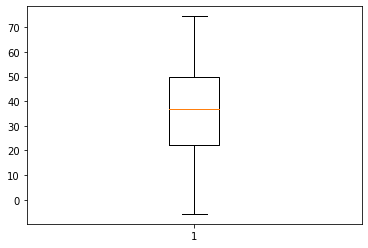

In [29]:
#Pressure show outliers no outliers
dewPointSamples = df['dewPoint'].sample(n=100, random_state=5)
plt.boxplot(dewPointSamples)
plt.show()



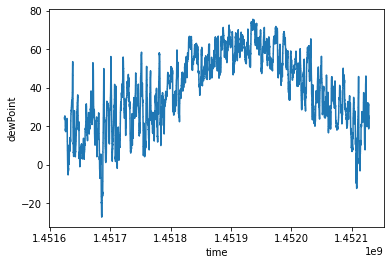

In [30]:
#samples = df[['time','dewPoint']].sample(n=100, random_state=5).sort_index()
samples = df[['time','dewPoint']]
samples_x=samples['time']
samples_y = samples['dewPoint']

plt.plot(samples_x,samples_y)
plt.xlabel('time')
plt.ylabel('dewPoint')
plt.show()

The histogram function also gives nice information about the destribution of each parameter
<br/>This also makes the outliers nice visible. use [kW] has outliers starting at 2kW up to 15 kW (!)
<br/>

In [31]:
dfSubSet = df[[ 'temperature','windSpeed','humidity','pressure', 'dewPoint','use [kW]']]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd5c523350>,
      dtype=object)

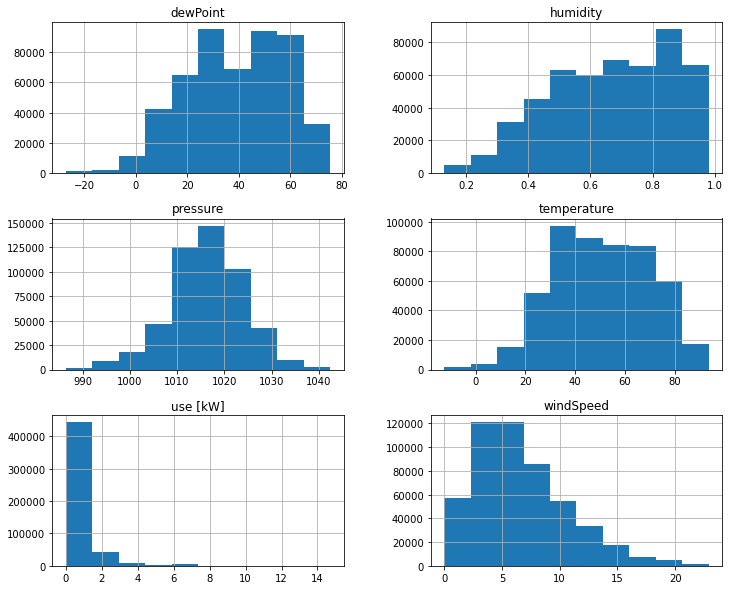

In [32]:
dfSubSet.hist(figsize = (12,10))

<b>What's the correlation towards 'use [kW]'</b>

Let's have a look at the correlations between 'use [kW]' and the weather data properties

In [33]:
dfSubSet = df[['time', 'temperature','windSpeed','humidity','pressure', 'dewPoint','use [kW]']]
corr_matrix=dfSubSet.corr()
corr_matrix['use [kW]'].sort_values(ascending=False)

use [kW]       1.000000
dewPoint       0.016040
humidity       0.011511
pressure       0.010730
temperature    0.010379
time          -0.002421
windSpeed     -0.003853
Name: use [kW], dtype: float64

The use [kW] has some correlation with dewPoint, humidity, pressure and temperature and a very small correlation with tim e and windSpeed. The correlation with time could be stronger if we split this day of year part and minute of day part. At least that's the for my personal situation. But let's not make assumptions 

In [34]:
from pandas.plotting import scatter_matrix

In [35]:
attributes=['use [kW]', 'temperature','windSpeed','humidity','pressure', 'dewPoint']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd5d1c6f50>,
      dtype=object)

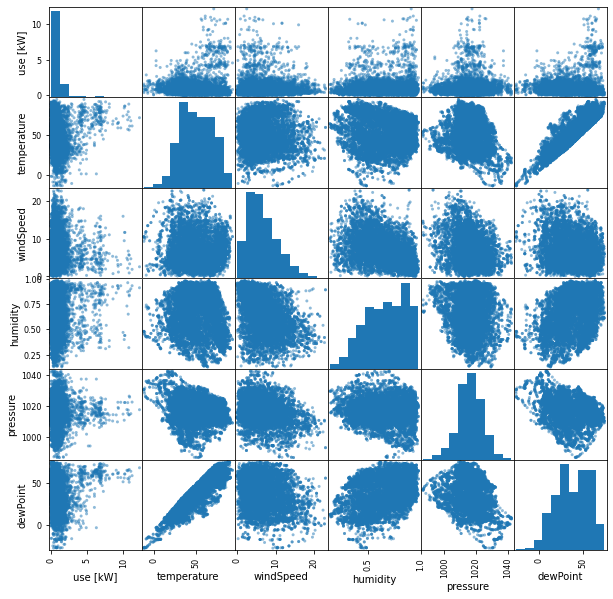

In [36]:
scatter_matrix(df[attributes].sample(n=10000, random_state=5).sort_index(), figsize=(10,10))

If we look at 'use [kW]' versus the other columns, we can see there's (unfortunately) no strong correlation between any of the other columns (for comparison: dew point and temperature have a strong correlation)
So hopefully a combination of the weather data does have a stronger correlation to the temperature.
N.B.: the energy usage is likely to correlate stronger to time of day + weather conditions.
<br/>Let's find out in part II: ETL